In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
for dirname, _, filenames in os.walk('D:\Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Kaggle\heart.csv
D:\Kaggle\Untitled.ipynb
D:\Kaggle\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [3]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum() #returns the number of missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Number of males and females whose heart data is stored in the dataset
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
#Count of the number of males and females who have heart disease
df.sex[df.target==1].value_counts()

1    93
0    72
Name: sex, dtype: int64

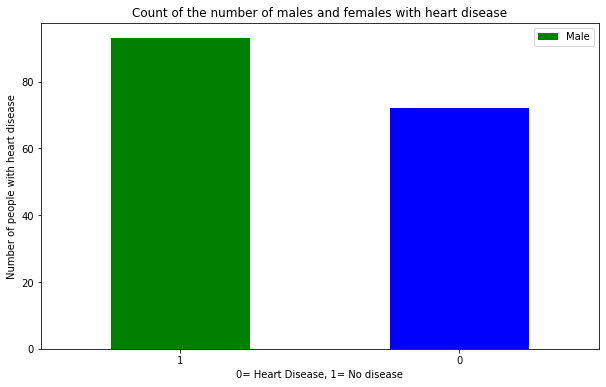

In [14]:
df.sex[df.target==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the number of males and females with heart disease")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Male","Female"])
plt.xticks(rotation=0);

In [11]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


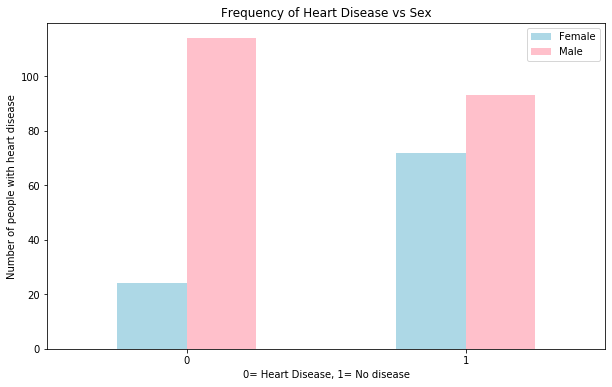

In [13]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=["lightblue","pink"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [15]:
#Building a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


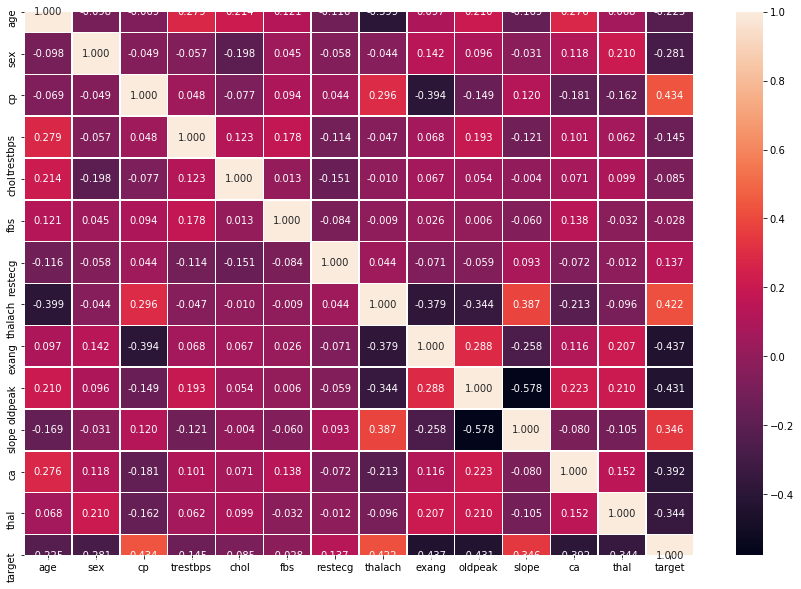

In [16]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

In [17]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['age', 	'sex', 	'cp', 'trestbps', 'chol', 	'fbs', 	'restecg', 	'thalach' ,	'exang', 	'oldpeak' ,	'slope', 	'ca', 'thal']
df[feat] = scal.fit_transform(df[feat])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [18]:
"""
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#df[features] = scaler.fit_transform(df[features])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [19]:
#Creating Features and Target variable
X=df.drop("target",axis=1).values
Y=df.target.values

In [20]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [21]:
#Create a function for evaluating metrics
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
  acc=accuracy_score(Y_test,Y_pred)
  rcl=recall_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               
              }

  return print(metric_dict)

#evaluation(Y_test,SVC_Y_pred)

In [22]:
#Fitting and Comparing different Models
np.random.seed(42)
"""
NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator. It provides an essential input that enables NumPy to generate pseudo-random numbers for random processes."""
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier()
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
#print(Knn_score)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.869, 'recall': 0.912, 'F1 score': 0.886}


In [23]:
np.random.seed(42) #rovides an essential input that enables NumPy to generate pseudo-random numbers for random processes
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression()
LR_clf.fit(X_train,Y_train)
LR_Y_pred=LR_clf.predict(X_test)
LR_score=LR_clf.score(X_test,Y_test)
#print(LR_score)
evaluation(Y_test,LR_Y_pred)

{'accuracy': 0.836, 'recall': 0.912, 'F1 score': 0.861}


In [24]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=450)
RF_clf.fit(X_train,Y_train)
RF_score=RF_clf.score(X_test,Y_test)
RF_Y_pred=RF_clf.predict(X_test)
#print(RF_score)
evaluation(Y_test,RF_Y_pred)

{'accuracy': 0.869, 'recall': 0.882, 'F1 score': 0.882}


In [25]:
np.random.seed(42)
from sklearn.svm import SVC
SVC_clf=SVC()
SVC_clf.fit(X_train,Y_train)
SVC_score=SVC_clf.score(X_test,Y_test)
SVC_Y_pred=SVC_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,SVC_Y_pred)

{'accuracy': 0.836, 'recall': 0.941, 'F1 score': 0.865}


In [27]:
from xgboost import XGBClassifier
XGB_clf=XGBClassifier()
XGB_clf.fit(X_train,Y_train)
XGB_score=XGB_clf.score(X_test,Y_test)
XGB_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,XGB_Y_pred)

{'accuracy': 0.852, 'recall': 0.882, 'F1 score': 0.87}


In [28]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine',"XGBoost"], 'Accuracy': [LR_score*100,
                    RF_score*100,Knn_score*100,SVC_score*100,XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,83.606557
1,Random Forest,86.885246
2,K-Nearest Neighbour,86.885246
3,Support Vector Machine,83.606557
4,XGBoost,85.245902


In [29]:
#Tuning KNN
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    print(f"Accuracy with {i} no. of neighbors: {knn.fit(X_train, Y_train).score(X_test,Y_test)}%")

Accuracy with 1 no. of neighbors: 0.8524590163934426%
Accuracy with 2 no. of neighbors: 0.8360655737704918%
Accuracy with 3 no. of neighbors: 0.8688524590163934%
Accuracy with 4 no. of neighbors: 0.8688524590163934%
Accuracy with 5 no. of neighbors: 0.8688524590163934%
Accuracy with 6 no. of neighbors: 0.8524590163934426%
Accuracy with 7 no. of neighbors: 0.9016393442622951%
Accuracy with 8 no. of neighbors: 0.8688524590163934%
Accuracy with 9 no. of neighbors: 0.8524590163934426%
Accuracy with 10 no. of neighbors: 0.8524590163934426%
Accuracy with 11 no. of neighbors: 0.819672131147541%
Accuracy with 12 no. of neighbors: 0.819672131147541%
Accuracy with 13 no. of neighbors: 0.8032786885245902%
Accuracy with 14 no. of neighbors: 0.8360655737704918%
Accuracy with 15 no. of neighbors: 0.8360655737704918%
Accuracy with 16 no. of neighbors: 0.819672131147541%
Accuracy with 17 no. of neighbors: 0.8032786885245902%
Accuracy with 18 no. of neighbors: 0.8032786885245902%
Accuracy with 19 no. o

In [30]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier(n_neighbors=7)
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.902, 'recall': 0.941, 'F1 score': 0.914}


In [31]:
#Tuning Random Forest
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
for i in range(1,40,1):
  print(f"With {i*10} estimators:")
  clf2=RandomForestClassifier(n_estimators=i*10,max_depth=i,random_state=i).fit(X_train,Y_train)
  print(f"Accuracy: {clf2.score(X_test,Y_test)*100:2f}%")


With 10 estimators:
Accuracy: 77.049180%
With 20 estimators:
Accuracy: 83.606557%
With 30 estimators:
Accuracy: 88.524590%
With 40 estimators:
Accuracy: 86.885246%
With 50 estimators:
Accuracy: 86.885246%
With 60 estimators:
Accuracy: 88.524590%
With 70 estimators:
Accuracy: 83.606557%
With 80 estimators:
Accuracy: 86.885246%
With 90 estimators:
Accuracy: 83.606557%
With 100 estimators:
Accuracy: 86.885246%
With 110 estimators:
Accuracy: 85.245902%
With 120 estimators:
Accuracy: 86.885246%
With 130 estimators:
Accuracy: 85.245902%
With 140 estimators:
Accuracy: 88.524590%
With 150 estimators:
Accuracy: 85.245902%
With 160 estimators:
Accuracy: 83.606557%
With 170 estimators:
Accuracy: 85.245902%
With 180 estimators:
Accuracy: 88.524590%
With 190 estimators:
Accuracy: 85.245902%
With 200 estimators:
Accuracy: 83.606557%
With 210 estimators:
Accuracy: 86.885246%
With 220 estimators:
Accuracy: 85.245902%
With 230 estimators:
Accuracy: 86.885246%
With 240 estimators:
Accuracy: 85.245902%
W

In [32]:
from sklearn.ensemble import RandomForestClassifier
RF_clf2=RandomForestClassifier(n_estimators=30,max_depth=3,random_state=3)
RF_clf2.fit(X_train,Y_train)
RF2_acc_score=RF_clf2.score(X_test,Y_test)
RF2_Y_pred=RF_clf2.predict(X_test)
#print(RF2_acc_score)
evaluation(Y_test,RF2_Y_pred)

{'accuracy': 0.885, 'recall': 0.941, 'F1 score': 0.901}


In [33]:
#Tuning XGBoost manually
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

xgb.fit(X_train,Y_train)
xgb_score=XGB_clf.score(X_test,Y_test)
xgb_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,xgb_Y_pred)

{'accuracy': 0.852, 'recall': 0.882, 'F1 score': 0.87}


In [34]:
#Hyper parameter tuning SVC using GridSearchCV
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1,2, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
gs_clf = GridSearchCV(SVC(), param_grid,cv=5, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gs_clf.fit(X_train, Y_train)

print(gs_clf.best_params_)

print(f"Accuracy score:{gs_clf.score(X_test,Y_test)}%")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.

[CV 2/5] END .......................C=2, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=2, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=2, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=2, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=2, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ....................C=2, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ....................C=2, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ....................C=2, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ....................C=2, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END .....................C=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ...............

In [35]:
#Hyper parameter tuning KNN using GridSearchCV
knn_grid={'n_neighbors': np.arange(1,30,1),
          'leaf_size': np.arange(1,50,1)}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,cv=5,verbose=True)

gs_knn.fit(X_train, Y_train)

gs_knn.best_params_

print(f"Accuracy score:{gs_knn.score(X_test,Y_test)*100}%")

Fitting 5 folds for each of 1421 candidates, totalling 7105 fits
Accuracy score:80.32786885245902%


In [36]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,83.606557
1,Random Forest,88.524590
2,K-Nearest Neighbour,90.163934
3,Support Vector Machine,83.606557
4,Extreme Gradient Boost,85.245902


In [38]:
#Trying StackingCV Classifier
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[xgb,Knn_clf,RF_clf2],meta_classifier= Knn_clf)
scv.fit(X_train,Y_train)
scv_score=scv.score(X_test,Y_test)
scv_Y_pred=scv.predict(X_test)
#print(SVC_score)
evaluation(Y_test,scv_Y_pred)

ModuleNotFoundError: No module named 'mlxtend'